In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("combined_damage_data.csv")

In [13]:
df['total_area_damaged_open_space'] = df.filter(regex='_area_damaged_open_space$').sum(axis=1)
df['total_area_damaged_ll'] = df.filter(regex='_area_damaged_ll$').sum(axis=1)
df['total_area_damaged_all'] = df.filter(regex='_area_damaged_all$').sum(axis=1)
df

,2020_CountyName,2020_area_damaged_open_space,2020_area_damaged_ll,2020_area_damaged_all,2010_CountyName,2010_area_damaged_open_space,2010_area_damaged_ll,2010_area_damaged_all,2017_CountyName,2017_area_damaged_open_space,...,2011_area_damaged_all,2003_CountyName,2003_area_damaged_open_space,2003_area_damaged_ll,2003_area_damaged_all,total_area_damaged_open_space,total_area_damaged_ll,total_area_damaged_all,total_area_damaged_ll_percent,total_area_damaged_open_space_percent
0,Camden,0.000000,0.000000,0.000000,Camden,0.000000,0.000000,0.000000,Camden,0.000000,...,0.000000,Camden,0.090806,0.102164,0.181612,0.181612,0.204328,0.363224,0.529430,0.470570
1,Gates,0.000000,0.000000,0.000000,Gates,0.000000,0.000000,0.000000,Gates,0.000000,...,0.000000,Gates,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
2,Iredell,0.000000,0.000000,0.000000,Iredell,0.000000,0.000000,0.000000,Iredell,0.000000,...,0.000000,Iredell,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
3,Wilkes,0.000000,0.000000,0.000000,Wilkes,0.655554,0.828129,1.311108,Wilkes,0.000000,...,0.000000,Wilkes,0.009833,0.012422,0.019667,21.229020,26.847927,42.458039,0.558437,0.441563
4,Union,0.000000,0.000000,0.000000,Union,0.000000,0.000000,0.000000,Union,0.000000,...,0.000000,Union,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
5,Cabarrus,0.000000,0.000000,0.000000,Cabarrus,0.000000,0.000000,0.000000,Cabarrus,0.000000,...,0.000000,Cabarrus,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
6,Wake,0.000000,0.000000,0.000000,Wake,0.000000,0.000000,0.000000,Wake,0.000000,...,0.000000,Wake,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
7,Franklin,0.000000,0.000000,0.000000,Franklin,0.000000,0.000000,0.000000,Franklin,0.000000,...,0.000000,Franklin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
8,Pender,0.003529,0.007902,0.007058,Pender,0.000000,0.000000,0.000000,Pender,0.000000,...,0.000000,Pender,0.000000,0.000000,0.000000,5.696792,12.769431,11.393585,0.691502,0.308498
9,New Hanover,0.007767,0.064809,0.015534,New Hanover,0.000000,0.000000,0.000000,New Hanover,0.000000,...,0.000000,New Hanover,0.000000,0.000000,0.000000,46.761365,390.668909,93.522730,0.893100,0.106900


In [11]:
top_10_df = df.nlargest(10, 'total_area_damaged_all')


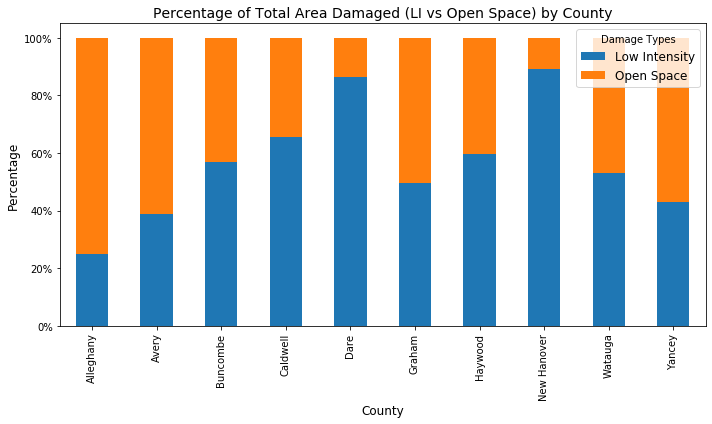

In [19]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
df = top_10_df
# Normalize the values to percentage for stacking
df['total_area_damaged_ll_percent'] = df['total_area_damaged_ll'] / (df['total_area_damaged_ll'] + df['total_area_damaged_open_space'])
df['total_area_damaged_open_space_percent'] = df['total_area_damaged_open_space'] / (df['total_area_damaged_ll'] + df['total_area_damaged_open_space'])

# Group by 'CountyName' and aggregate the percentage columns
grouped = df.groupby('2020_CountyName')[['total_area_damaged_ll_percent', 'total_area_damaged_open_space_percent']].sum()

# Plotting the stacked bar graph
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding titles and labels
ax.set_title('Percentage of Total Area Damaged (LI vs Open Space) by County', fontsize=14)
ax.set_xlabel('County', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.legend(['Low Intensity', 'Open Space'], title='Damage Types', fontsize=12)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
# Display the plot
plt.tight_layout()
plt.show()


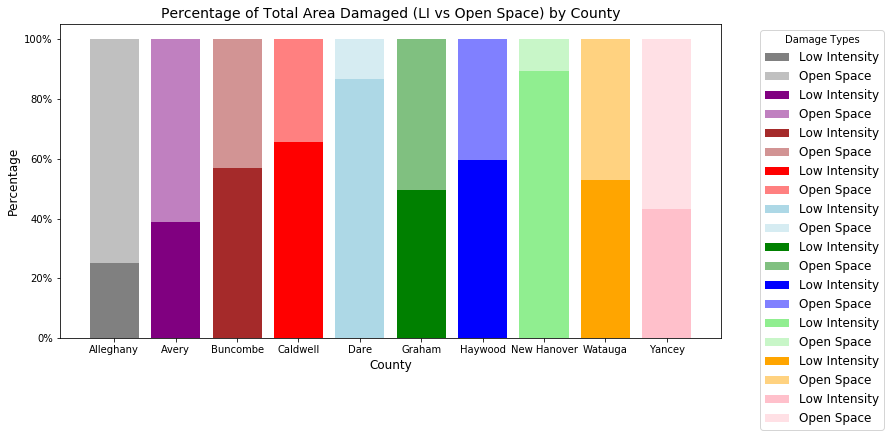

In [28]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.colors as mcolors
import pandas as pd

# Create a DataFrame for county color mapping
county_data = {
    '2020_CountyName': ['New Hanover', 'Dare', 'Graham', 'Haywood', 'Buncombe', 'Yancey', 'Caldwell', 'Avery', 'Watauga', 'Alleghany'],
    'Color': ['lightgreen', 'lightblue', 'green', 'blue', 'brown', 'pink', 'red', 'purple', 'orange', 'grey']
}

color_df = pd.DataFrame(county_data)

# Normalize the values to percentage for stacking
df['total_area_damaged_ll_percent'] = df['total_area_damaged_ll'] / (df['total_area_damaged_ll'] + df['total_area_damaged_open_space'])
df['total_area_damaged_open_space_percent'] = df['total_area_damaged_open_space'] / (df['total_area_damaged_ll'] + df['total_area_damaged_open_space'])

# Group by 'CountyName' and aggregate the percentage columns
grouped = df.groupby('2020_CountyName')[['total_area_damaged_ll_percent', 'total_area_damaged_open_space_percent']].sum()

# Merge color DataFrame with the grouped DataFrame
grouped = grouped.reset_index()
grouped = pd.merge(grouped, color_df, on='2020_CountyName', how='left')

# Function to lighten a color
def lighten_color(color, factor=0.5):
    rgb = mcolors.hex2color(mcolors.CSS4_COLORS[color] if color in mcolors.CSS4_COLORS else color)
    return mcolors.rgb2hex([min(1, c + (1 - c) * factor) for c in rgb])

# Plotting the stacked bar graph with custom colors
fig, ax = plt.subplots(figsize=(12.5, 6))

# Plot each county with its corresponding color
for idx, row in grouped.iterrows():
    base_color = row['Color']
    lighter_color = lighten_color(base_color, factor=0.5)  # Make Open Space a lighter shade
    
    ax.bar(row['2020_CountyName'], row['total_area_damaged_ll_percent'], label='Low Intensity', color=base_color, bottom=0)
    ax.bar(row['2020_CountyName'], row['total_area_damaged_open_space_percent'], label='Open Space', color=lighter_color, bottom=row['total_area_damaged_ll_percent'])

# Adding titles and labels
ax.set_title('Percentage of Total Area Damaged (LI vs Open Space) by County', fontsize=14)
ax.set_xlabel('County', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)

# Update the legend labels
ax.legend(title='Damage Types', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')


# Format the y-axis as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

# Display the plot
plt.tight_layout()
plt.show()
